# LASSO AND INDUCTIVE CONFORMAL PREDICTION

__TASK 1:Loading the scikit-learn version of the diabetes dataset into Jupyter
notebook using the load_diabetes function__

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
Diabetes= load_diabetes()
print("Keys of Diabetes_dataset:\n", Diabetes.keys())
print(Diabetes.DESCR)

Keys of Diabetes_dataset:
 dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / 

__TASK 2:Splitting the dataset into the training and test sets using the function
train_test_split in scikit-learn. Here and below using birthday
(in the format DDMM omitting leading zeros if any) as random_state.__

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(Diabetes['data'],Diabetes['target'],train_size=0.75,test_size=0.25,random_state=3110)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


__TASK 3:Answering the following questions:
What is the training and test R2
for the Lasso model using the default
parameters? How many features does this model use? What are the names
of those features?__

* As we can see after running this piece of code, Lasso does quiet badly on both testing and training set.
* This indicates we are underfitting
* Lasso has regularization parameter, alpha that controls how strongly coeffiecients are pushed towards zero.
* In case like this here, when we are not mentioning the value of alpha, it takes default value as 1.0

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print('Training R2 score in scikit-learn dataset:',lasso.score(X_train,y_train))
print('Testing R2 score in scikit learn dataset:',lasso.score(X_test,y_test))
print('Number of features used:',np.sum(lasso.coef_ !=0))
x = lasso.coef_ 
print(x)
print('All features:',Diabetes.feature_names)
for i in range(len(x)):
    if x[i] != 0:
        print('Feature  used:',Diabetes.feature_names[i])

Training R2 score in scikit-learn dataset: 0.35901908382457937
Testing R2 score in scikit learn dataset: 0.36586111649693864
Number of features used: 3
[  0.           0.         325.21633113  27.0710417    0.
   0.          -0.           0.         341.80553958   0.        ]
All features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Feature  used: bmi
Feature  used: bp
Feature  used: s5


__TASK 4:Now loading the original diabetes dataset from the web page given above. I have pasted the file in the repository but
you can also choose the link diabetes data. Download the file
Tab-delimited diabetes data (text file)
by right-clicking on it. All the remaining tasks should be performed using
this file (diabetes.data), which is the original diabetes dataset. The
labels are given in the last column of the file diabetes.data__

In [4]:
import pandas as pd
dataset=pd.read_csv("diabetes.txt",delim_whitespace=True)
features= dataset.iloc[:,0:10]
Labels= dataset.iloc[:,10:11]
print(features)
print(Labels)

          age       sex       bmi       map        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

__TASK 5:Splitting the dataset into the training and test sets using my birthday (in the
format DDMM) as random_state.__

In [5]:
from sklearn.model_selection import train_test_split
train_XX,test_XX,train_yy,test_yy= train_test_split(features,Labels,train_size=0.75,test_size=0.25,random_state=3110)
print(train_XX.shape)
print(test_XX.shape)
print(train_yy.shape)
print(test_yy.shape)

(331, 10)
(111, 10)
(331, 1)
(111, 1)


__TASK 6:Repeat item 3 for the current dataset and Commenting on the differences from
what we observe in item 3.__

* The main difference here in task 3 and 6 are:
* The training and testing R2 score is improving as the dataset changes
* further more Lasso is only using 2 features in Task 3 and make all other as zero while it's using all features in task 6.
* This is what is known as a form of **automatic feature selection**.

In [6]:
from sklearn.linear_model import Lasso
lasso_new = Lasso().fit(train_XX,train_yy)
print('Training R2 score in Original Dataset:',lasso_new.score(train_XX,train_yy))
print('Testing R2 score in Original Dataset:',lasso_new.score(test_XX,test_yy))
print('Number of features used:',np.sum(lasso_new.coef_ !=0))
x = lasso_new.coef_ 
print(x)
print('All features:',dataset.columns)
for i in range(len(x)):
    if x[i] != 0:
        print('Feature  used:',dataset.columns[i])

Training R2 score in Original Dataset: 0.35901908382457937
Testing R2 score in Original Dataset: 0.36586111649693864
Number of features used: 3
[  0.           0.         325.21633113  27.0710417    0.
   0.          -0.           0.         341.80553958   0.        ]
All features: Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')
Feature  used: bmi
Feature  used: map
Feature  used: ltg


__TASK 7:Preprocessing the training and test sets in the same way and avoiding data
snooping. Using StandardScaler.__

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_XX)
test_X_scaled = scaler.fit_transform(test_XX)
print(train_X_scaled)
print(test_X_scaled)

[[ 0.23866383  1.06559086  0.73719364 ...  2.96009726  0.96715684
   0.97189782]
 [-0.79014377  1.06559086  1.48354327 ...  1.46348122  1.067754
   1.39630175]
 [-0.27573997 -0.93844649  1.25737671 ...  0.6924972   1.49665046
   0.12308996]
 ...
 [-1.89243763  1.06559086 -1.90895504 ... -0.06336949  0.50354771
   0.03820918]
 [ 0.01820505 -0.93844649 -0.19008923 ... -0.81923617 -1.40559502
  -1.15012182]
 [ 0.16517757 -0.93844649 -0.48410575 ... -1.46172286 -1.36751198
  -0.81059868]]
[[ 0.36677355 -0.93880559  0.52874303 ... -0.87198995  1.11934022
  -0.51405156]
 [-0.42289623 -0.93880559  2.10325424 ... -0.02517556  1.25688278
   1.01008128]
 [-2.17771796 -0.93880559 -1.68470027 ... -1.71880433 -1.27540272
  -0.41879326]
 ...
 [ 0.45451464 -0.93880559  0.59720003 ... -0.74496779 -0.97732242
  -0.51405156]
 [ 0.7177379  -0.93880559  1.0992181  ...  1.24504601 -1.00810834
  -0.03776005]
 [ 0.36677355  1.06518326 -0.3840171  ...  0.82163882 -0.06347527
  -0.13301835]]


__TASK 8:Repeat item 3 for the current training and test sets.__

In [8]:
from sklearn.linear_model import Lasso
lasso_2 = Lasso().fit(train_X_scaled,train_yy)
print('Training R2 score in Normalized data:',lasso_2.score(train_X_scaled,train_yy))
print('Testing R2 score in Normalized data:',lasso_2.score(test_X_scaled,test_yy))
print('Number of features used:',np.sum(lasso_2.coef_ !=0))
x = lasso_2.coef_ 
print(x)
print('All features:',dataset.columns)
for i in range(len(x)):
    if x[i] != 0:
        print('Feature  used:',dataset.columns[i])
    else:
        print('No feature used')

Training R2 score in Normalized data: 0.5220790901067937
Testing R2 score in Normalized data: 0.486463719094818
Number of features used: 9
[ -0.59025591  -8.8850563   22.63918114  14.21799327  -8.28617402
  -0.         -10.18440253   2.18496366  26.14063185   4.07861648]
All features: Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')
Feature  used: age
Feature  used: sex
Feature  used: bmi
Feature  used: map
Feature  used: tc
No feature used
Feature  used: hdl
Feature  used: tch
Feature  used: ltg
Feature  used: glu


__Are our current results closer to those in item 3 or
item 6? Notice that a priori you would expect your current results to be
closer to those in item 3, since the reason for different results in items 3
and 6 was that the former were for normalized data while the latter were
for the original data. Is this expectation confirmed? If not, why?__

* No, The expectation is not confirmed in my case
* If we have a large amount of features and expect only few of them to be important then, Lasso might be a better choice.
* It could be the case that Lasso here is making even important features as zero.

__TASK 9:Varying the regularization parameter α in the Lasso, plotting the test R2 vs
the number of features used (i.e., those with non-zero coefficients).__

* I will prefer the value 7(Number of features used). Due to L1 regularization, Lasso has made 3 of the coefficient equal 0
* At this point R2 value is more close to 1.
* Here also I think value of alpha is optimal.

C:\Users\ammar\AppData\Local\Temp/ipykernel_49880/311076048.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso01 = Lasso(alpha=x,max_iter=100000).fit(train_X_scaled,train_yy)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468502.67792277824, tolerance: 197.63306163141993
  model = cd_fast.enet_coordinate_descent(


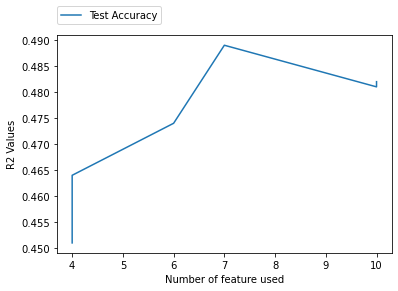

In [9]:
from sklearn.linear_model import Lasso
%matplotlib inline
import matplotlib.pyplot as plt
def LASSO(x):
    lasso01 = Lasso(alpha=x,max_iter=100000).fit(train_X_scaled,train_yy)
    return round(lasso01.score(test_X_scaled,test_yy),3),np.sum(lasso01.coef_ !=0)
alphas=[0,0.0001,0.001, 0.01, 0.1, 2,5,7,10]
x_plot=[]
y_plot=[]
for i in alphas:
    x_cord,y_cord=LASSO(i)
    y_plot.append(y_cord)
    x_plot.append(x_cord)

plt.plot(y_plot,x_plot, label="Test Accuracy")
plt.ylabel("R2 Values")
plt.xlabel("Number of feature used")
plt.legend(ncol=2,loc=(0,1.05))

__TASK 10:Choosing the regularization parameter for the Lasso using cross-validation
on the training set. Training the Lasso on the whole training set using the
chosen values of the parameters. Reporting the resulting training and test
R2 and the number of features used.__

In [10]:
param_grid = {'alpha': [0,0.0001,0.001, 0.01, 0.1, 2,5,7,10],
             'max_iter':[100000]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=10)
grid_search.fit(train_X_scaled,train_yy)
print('Training R2 score:',grid_search.score(test_X_scaled,test_yy))
print('Best value of Alpha:',grid_search.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414475.3557116703, tolerance: 170.20219461279464
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

Training R2 score: 0.4889181200589179
Best value of Alpha: {'alpha': 2, 'max_iter': 100000}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433379.16870784794, tolerance: 183.55655201342284
  model = cd_fast.enet_coordinate_descent(


In [11]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=2).fit(train_X_scaled,train_yy)
print('Training R2 score in Normalized data:',lasso_best.score(train_X_scaled,train_yy))
print('Testing R2 score in Normalized data:',lasso_best.score(test_X_scaled,test_yy))
print('Number of features used:',np.sum(lasso_best.coef_ !=0))
x = lasso_best.coef_ 
print(x)
print('All features:',dataset.columns)
for i in range(len(x)):
    if x[i] != 0:
        print('Feature  used:',dataset.columns[i])
    else:
        print('No feature used')

Training R2 score in Normalized data: 0.5170699623448385
Testing R2 score in Normalized data: 0.4889181200589179
Number of features used: 7
[ -0.          -6.9564373   22.28265837  13.10046504  -4.99978044
  -0.         -11.26541592   0.          24.99350176   3.08585468]
All features: Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'y'],
      dtype='object')
No feature used
Feature  used: sex
Feature  used: bmi
Feature  used: map
Feature  used: tc
No feature used
Feature  used: hdl
No feature used
Feature  used: ltg
Feature  used: glu


__<h1>Task 11:Implementing an inductive conformal predictor as follows:</h1>__

__(a) Splitting the training set that we obtained in item 5 into two parts:
the calibration set of size 99 and the rest of the training set (the
training set proper). Using birthday (in the format DDMM) as
random_state.__

In [12]:
X_train_proper, X_calibration, y_train_proper, y_calibration= train_test_split(train_XX,train_yy,test_size=99,random_state=3110)
print(X_train_proper.shape)
print(X_calibration.shape)
print(y_train_proper.shape)
print(y_calibration.shape)

(232, 10)
(99, 10)
(232, 1)
(99, 1)


__(b) Preprocessing the training set proper, calibration set, and test set in
the same way using StandardScaler. Namely, fit the scaler to the
training set proper and then use it to transform all three.__

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_new = StandardScaler()
scaler_new.fit(X_train_proper)
X_train_proper_scaled = scaler_new.transform(X_train_proper)
X_calibration_scaled = scaler_new.transform(X_calibration)
test_X_scaled = scaler.fit_transform(test_XX)

__(c)Using the nonconformity measure α = |y − yˆ|, where y is the true
label and ˆy is its prediction given the training set proper, for each test
sample computing the prediction interval for it. Doing this for significance
levels 5% and 20%. For each of these significance levels also computing:
 the length of the prediction intervals for the test samples
 and the test error rate of our inductive conformal predictor
.__

In [14]:
def prediction(X_train_proper_scaled,y_train_proper,X_calibration_scaled,y_calibration):
    lasso_final = Lasso(alpha=2).fit(X_train_proper_scaled,y_train_proper)
    print('Training R2 score in Normalized data:',lasso_final.score(X_train_proper_scaled,y_train_proper))
    y_hat =lasso_final.predict(X_calibration_scaled)
    result=[]
    array1 = np.array(y_calibration)
    array2 = np.array(y_hat)
    for i in range(len(array1)):
        result.append(array1[i]-array2[i])
    result=np.concatenate(result, axis=0)
    print('Different values of alpha:',np.absolute(result))

In [15]:
prediction(X_train_proper_scaled,y_train_proper,X_calibration_scaled,y_calibration)

Training R2 score in Normalized data: 0.5355551717842536
Different values of alpha: [  9.31425019  11.33576051 119.32931757 119.08430716  95.075688
  11.09435999   8.61606448  92.81954955  87.03952306  19.8397432
  96.16714722 103.65951103  47.97775047  14.38168549  91.61270174
  17.09949025  12.49284524  38.24454669   1.54655344  63.25704931
  23.66465778  18.39933036   9.0104915   57.48650293  15.6137564
  23.55399711  49.36258561  38.70687005  12.48660788  26.30026549
  39.5947327   20.69734215  97.00149191  32.28396319  67.50336744
  99.30243938  88.46984057 139.20483026  62.09996911  58.14746608
  21.97326938  74.80294043  67.83805601 105.72279168   8.74458578
  25.51800744   2.4842174  112.91645353   4.89274753  12.44076843
  19.30509109  21.08198894  15.71869249  98.99282772  88.57634281
  71.60539762  43.18336269   4.57492578  28.24475884  37.54482519
  29.35468165  41.79480795  33.57098907  81.61169285  70.53922046
  54.14441098  30.37248344  41.51423974  32.73889493  50.50426